# Part II - Prosper Loan Data Exploration
## by Narae Im

## Investigation Overview

My main goal of this presentation is to figure out what features are affecting the Credit Grade(Rating) in the dataset. 

So I included 4 visualizations in this presentation. 

1) Credit Ratings by Debt To Income Ratio and Stated Monthly Income   
2) Distribution of Income Ranges and Credit Ratings   
3) Borrower Monthly Income across Employment Status and Credit Rating   
4) Debt To Income Ratio across Employment Status and Credit Rating   

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

print(df.shape)

(113937, 81)


In [31]:
# Convert data type of 'ListingCreationDate' from object to datetime
pd.to_datetime(df['ListingCreationDate'])

0        2007-08-26 19:09:29.263
1        2014-02-27 08:28:07.900
2        2007-01-05 15:00:47.090
3        2012-10-22 11:02:35.010
4        2013-09-14 18:38:39.097
                   ...          
113932   2013-04-14 05:55:02.663
113933   2011-11-03 20:42:55.333
113934   2013-12-13 05:49:12.703
113935   2011-11-14 13:18:26.597
113936   2014-01-15 09:27:37.657
Name: ListingCreationDate, Length: 113937, dtype: datetime64[ns]

In [32]:
pd.DatetimeIndex(df['ListingCreationDate']).year >= 2009

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# merge CreditGrade and ProsperRating (Alpha) columns into one column "Rating"
def RatingSelect(df):
    if pd.DatetimeIndex(df[['ListingCreationDate']]).year < 2009 :
        return df['CreditGrade']
    elif pd.DatetimeIndex(df[['ListingCreationDate']]).year >= 2009 : 
        return df['ProsperRating (Alpha)']
    else:
        return '' 

df['Rating'] = df.apply(RatingSelect, axis=1)
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Rating
57164,A3373589053764674143B97,905620,2013-09-17 19:26:50.300000000,NaN,36,Completed,2013-11-15 00:00:00,0.27623,0.2379,0.2279,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,D
51068,910A3536754921464C48F24,553452,2012-01-22 19:33:00.200000000,NaN,36,Past Due (31-60 days),NaN,0.34577,0.3058,0.2958,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,43,E
90333,A543337140492595489864E,48075,2006-10-13 15:30:25.413000000,D,36,Completed,2009-10-18 00:00:00,0.20735,0.2000,0.1950,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,21,D
36664,49A43578916228457358C1C,773718,2013-05-08 15:36:11.263000000,NaN,36,Completed,2014-01-13 00:00:00,0.25781,0.2199,0.2099,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,D
71259,3DC5352615312991569EF6E,525406,2011-09-05 18:56:20.103000000,NaN,60,Completed,2013-05-09 00:00:00,0.20436,0.1899,0.1799,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,262,B
51101,B6753551572761622BD207C,605151,2012-06-27 19:06:32.490000000,NaN,36,Current,NaN,0.24758,0.2099,0.1999,...,-768.47,0.0,0.0,0.0,1.0,0,0,0.0,283,C
93788,64F33596313929515DD8D90,1038932,2013-11-29 20:23:46.117000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,0.00,0.0,0.0,0.0,1.0,1,0,0.0,1,A
14708,E9453603718031514C22557,1188802,2014-03-01 17:35:18.860000000,NaN,36,Current,NaN,0.19029,0.1535,0.1435,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1,C
36823,7C253365601576223B6F553,15114,2006-05-22 18:57:42.083000000,AA,36,Completed,2009-06-05 00:00:00,0.09437,0.0875,0.0825,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,23,AA
11436,5DCF3540239472167DDC415,563515,2012-02-28 06:19:02.017000000,NaN,36,Completed,2013-11-20 00:00:00,0.35797,0.3177,0.3077,...,0.00,0.0,0.0,0.0,1.0,0,0,0.0,73,HR


In [34]:
# unique values of 'rating'
df['Rating'].value_counts()

C     23989
B     19967
D     19425
A     17864
E     13084
HR    10443
AA     8880
NC      141
Name: Rating, dtype: int64

In [35]:
# Convert 'Rating' into ordered categorical types
rating_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_rating = pd.api.types.CategoricalDtype(ordered=True, categories=rating_order)
df['Rating'] = df['Rating'].astype(ordered_rating)

In [36]:
# change column name 
df.rename({'ProsperRating (numeric)': 'Rating(numeric)'}, axis=1, inplace=True)

In [37]:
# drop duplicated data 
df = df.drop_duplicates()

In [38]:
# change column name 
df.rename({'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquent'}, axis=1, inplace=True)

In [39]:
df_origin = df.copy()
df = df[['LoanKey', 'Rating(numeric)', 'Rating', 'BorrowerRate', 
         'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
         'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TradesNeverDelinquent', 'AmountDelinquent',
         'DebtToIncomeRatio', 'IncomeRange','StatedMonthlyIncome', 'LoanOriginalAmount'
         ]]
df.head(10)

,LoanKey,Rating(numeric),Rating,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,TradesNeverDelinquent,AmountDelinquent,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,E33A3400205839220442E84,NaN,C,0.1580,CO,Other,Self-employed,True,640.0,659.0,0.81,472.0,0.17,"$25,000-49,999",3083.333333,9425
1,9E3B37071505919926B1D82,6.0,A,0.0920,CO,Professional,Employed,False,680.0,699.0,1.00,0.0,0.18,"$50,000-74,999",6125.000000,10000
2,6954337960046817851BCB2,NaN,HR,0.2750,GA,Other,Not available,False,480.0,499.0,NaN,NaN,0.06,Not displayed,2083.333333,3001
3,A0393664465886295619C51,6.0,A,0.0974,GA,Skilled Labor,Employed,True,800.0,819.0,0.76,10056.0,0.15,"$25,000-49,999",2875.000000,10000
4,A180369302188889200689E,3.0,D,0.2085,MN,Executive,Employed,True,680.0,699.0,0.95,0.0,0.26,"$100,000+",9583.333333,15000
5,C3D63702273952547E79520,5.0,B,0.1314,NM,Professional,Employed,True,740.0,759.0,1.00,0.0,0.36,"$100,000+",8333.333333,15000
6,CE963680102927767790520,2.0,E,0.2712,KS,Sales - Retail,Employed,False,680.0,699.0,0.68,0.0,0.27,"$25,000-49,999",2083.333333,3000
7,0C87368108902149313D53B,4.0,C,0.2019,CA,Laborer,Employed,False,700.0,719.0,0.80,0.0,0.24,"$25,000-49,999",3355.750000,10000
8,02163700809231365A56A1C,7.0,AA,0.0629,IL,Food Service,Employed,True,820.0,839.0,1.00,0.0,0.25,"$25,000-49,999",3333.333333,10000
9,02163700809231365A56A1C,7.0,AA,0.0629,IL,Food Service,Employed,True,820.0,839.0,1.00,0.0,0.25,"$25,000-49,999",3333.333333,10000


## Credit Ratings by Debt To Income Ratio and Stated Monthly Income

1) Credit Ratings by Debt To Income Ratio (Left)
The boundary of Debt To Income Ratio is getting smaller as Rating increases. We can see that with "AA" Rating, the Debt To Income Ratio is between 0 - 0.45, whereas with "HR" Rating, the ratio is from 0 - 0.7.   


2) Credit Ratings by Stated Monthly Income (Right)
As Rating increases, Stated Monthly Income ($) is also increasing. The median value is not significantly different among Rating, but the overall income range differs. For example, in "HR" rating, the monthly income range is from 0 to 10000 whereas in "AA", the income range is 0 to 16000.

I can guess that as Debt to Income Ratio decreases, the loan amount compared to income decreases, so the rating score for the loan increases. Also as income increases, the ability to pay the loan also increases, so the rating score for the loan also increases.

In the first boxplot, it's interesting to see that the width and whiskers of the boxplots shrink as credit rating increases. This suggests that with high rating, the ratio of debt to income is smaller than the low rating. Also in the second boxplot, the opposite pattern is shown. As rating increses, the width and whisker of the boxplots expands. That means that it is more likely to have higher monthly income with greater credit rating.

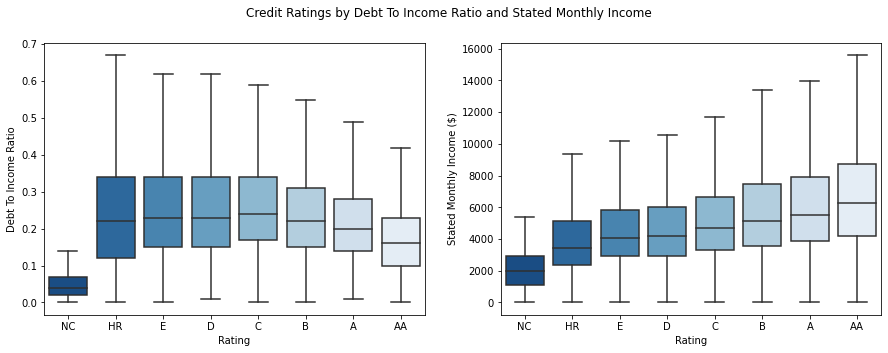

In [40]:
# box plot
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'DebtToIncomeRatio', x = 'Rating', palette = "Blues_r", showfliers = False)
plt.ylabel('Debt To Income Ratio')
plt.xlabel('Rating')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'StatedMonthlyIncome', x = 'Rating', palette = "Blues_r", showfliers = False)
plt.ylabel('Stated Monthly Income ($)')
plt.xlabel('Rating')

plt.suptitle('Credit Ratings by Debt To Income Ratio and Stated Monthly Income');

In [41]:
# Convert 'EmploymentStatus' into ordered categorical types
employmentstatus_order = ['Not Available', 'Not Employed', 'Other', 'Part-time', 'Self-employed', 'Employed', 'Full-time', 'Retired']
ordered_employmentstatus = pd.api.types.CategoricalDtype(ordered=True, categories=employmentstatus_order)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ordered_employmentstatus)

## Distribution of Income Ranges and Credit Ratings

In below clustered bar chart, we can see the higher incomes correlate to a higher credit rating. 

For example, in income range of \\$1 - 24,999, the lower rating("NC", "HR") is relatively more frequent than the higer ratings("A", "AA"). On the contrary, in a range of \\$75,000+, the higer ratings("A", "AA") is more frequent than the lower rating("NC", "HR") in proportion.

However, interesting point is that the higher income does not always mean the greatest proportion of higher rating. If you see below bar chart, actually the greatest proportion of higher ratings("A", "AA") is shown in the income range of \\$25,000 - \\$74,999. I guess that the result is attributed to the fact that the absolute number of data in those income range is a lot. 

In [42]:
# replace "Not Employed" as "$0"
df['IncomeRange'].replace(['Not employed'], '$0', inplace = True)

income_range = ['Not displayed','$0','$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ordered_income = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_income)

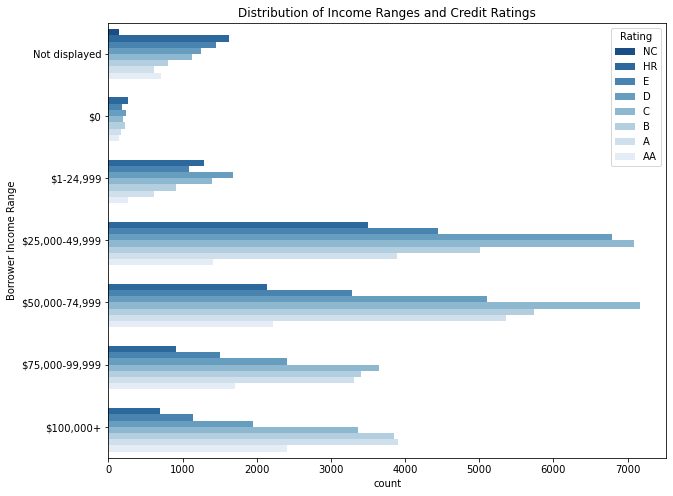

In [43]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = df, y = 'IncomeRange', hue = 'Rating',
                   palette = 'Blues_r')

ax.legend(title = 'Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

## Borrower Monthly Income across Employment Status and Rating

As shown in below plot, employment status has differences among ratings.   

In higer rating, such as "AA" and "A", "Retired" and "Full time" status were frequent, whereas in lower rating, such as "HR" and "E", "Part time" status was most frequent. I can guess that this trendency came from the general concept that more employment stability can guarantee the higher ability of repaying the loan.

Also, if you see the relationship with stated monthly income($) and Employment status, in more stable employment status such as "Full time" and "Employed" has higher monthly income, whereas in less stable employment status such as "Part-time" and "Other", the monthly income was low.

Interesting point was that the borrowers who are in "Self-employed" status, credit rating was relatively low despite of the fact that the stated monthly income was very high.

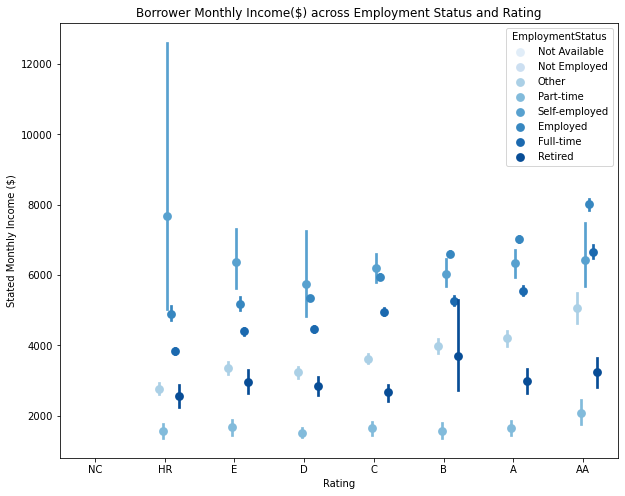

In [44]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df, x = 'Rating', y = 'StatedMonthlyIncome', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower Monthly Income($) across Employment Status and Rating')
plt.ylabel('Stated Monthly Income ($)')
plt.show();

## Debt To Income Ratio across Employment Status and Rating

In the below plot, I looked into Debt To Income Ratio across Employment Status and Rating.

Similarly to the previous plot, as the rating increases, the employment status were more stable. "Retired" and "Full time" status was more frequent in higher ratings, whereas "Part-time" and "Other" status was more frequent in lower ratings.

In debt to Income Ratio, significant diffrence between rating was not found, but among the employment status, normally less stable status such as "Part-time" and "Self-employed" has higer debt to income ratio. On the other way, in more stable employment status such as "Full-time" and "Employed", the debt to income ratio was relatively low.

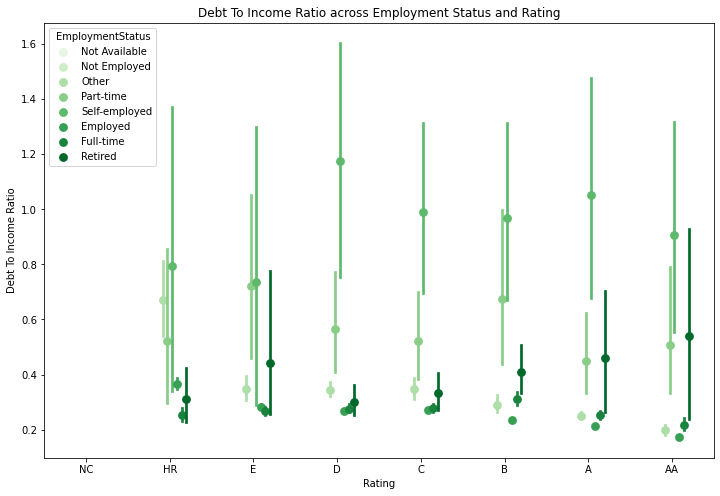

In [45]:
fig = plt.figure(figsize = [12,8])
ax = sb.pointplot(data = df, x = 'Rating', y = 'DebtToIncomeRatio', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Debt To Income Ratio across Employment Status and Rating')
plt.ylabel('Debt To Income Ratio')
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper-Loan-Data-Slides.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
